In [29]:
import numpy as np
from tensorflow.keras import datasets, utils, optimizers
import matplotlib.pyplot as plt

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense, Flatten

In [32]:
NUM_CLASSES = 10

In [33]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [34]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [35]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)

In [36]:
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [37]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(300, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(10, activation="softmax"))

/home/enrique/virtual_environments/generative_course/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#No sequential


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 968,560 (3.69 MB)

 Trainable params: 968,560 (3.69 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.3, shuffle=True)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2676 - loss: 2.0326 - val_accuracy: 0.3577 - val_loss: 1.7688
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3723 - loss: 1.7432 - val_accuracy: 0.3915 - val_loss: 1.6937
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4134 - loss: 1.6481 - val_accuracy: 0.4043 - val_loss: 1.6570
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4329 - loss: 1.5785 - val_accuracy: 0.4378 - val_loss: 1.5877
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4503 - loss: 1.5399 - val_accuracy: 0.4229 - val_loss: 1.6189
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4571 - loss: 1.5131 - val_accuracy: 0.4558 - val_loss: 1.5366
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4703 - loss: 1.4773 - val_accuracy: 0.4527 - val_loss: 1.5565
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4658 - loss: 

In [42]:
history = model.history

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


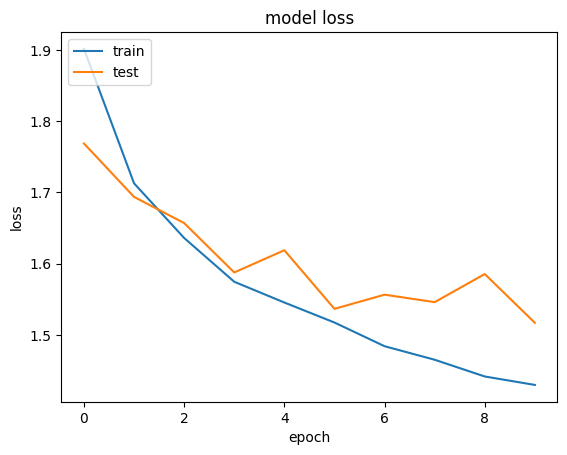

In [43]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
prediction = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4684 - loss: 1.4928


In [45]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


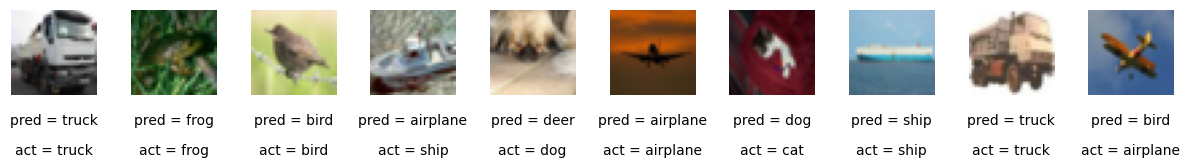

In [46]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

np.int64(5)